# Single-machine scheduling

Minimizing WIP considering job deadlines

1 | $d_j$ | $\sum_{j \in J}{w_j C_j}$

In [1]:
from bnbprob.machdeadline import MachDeadlineProb, MachInstance
from bnbpy import BestFirstBnB, BranchAndBound, configure_logfile, plot_tree

In [2]:
configure_logfile("sing_mach_sched.log", mode="w")

In [3]:
# Parameters
p = [4, 3, 8, 2, 7, 6]
w = [1, 1, 1, 1, 1, 1]
dl = [10, 20, 20, 30, 30, 30]

# Instantiate problem
jobs = [{'id': j, 'p': p[j], 'w': w[j], 'dl': dl[j]} for j in range(len(p))]
instance = MachInstance(jobs=jobs)
problem = MachDeadlineProb(instance.jobs)

# Solve
bnb = BranchAndBound()
bnb.solve(problem)
print(f'Nodes explored: {bnb.explored}')
print(bnb.solution)
print(bnb.solution.write())

# Solve
bnb_lb = BestFirstBnB(eval_node='in')
bnb_lb.solve(problem)
print(f'\nNodes explored: {bnb_lb.explored}')
print(bnb_lb.solution)
print(bnb_lb.solution.write())

Nodes explored: 5
Status: OPTIMAL | Cost: 86 | LB: 86
Job: 3 - Completion: 2
Job: 1 - Completion: 5
Job: 0 - Completion: 9
Job: 2 - Completion: 17
Job: 5 - Completion: 23
Job: 4 - Completion: 30

Nodes explored: 3
Status: OPTIMAL | Cost: 86 | LB: 86
Job: 3 - Completion: 2
Job: 1 - Completion: 5
Job: 0 - Completion: 9
Job: 2 - Completion: 17
Job: 5 - Completion: 23
Job: 4 - Completion: 30


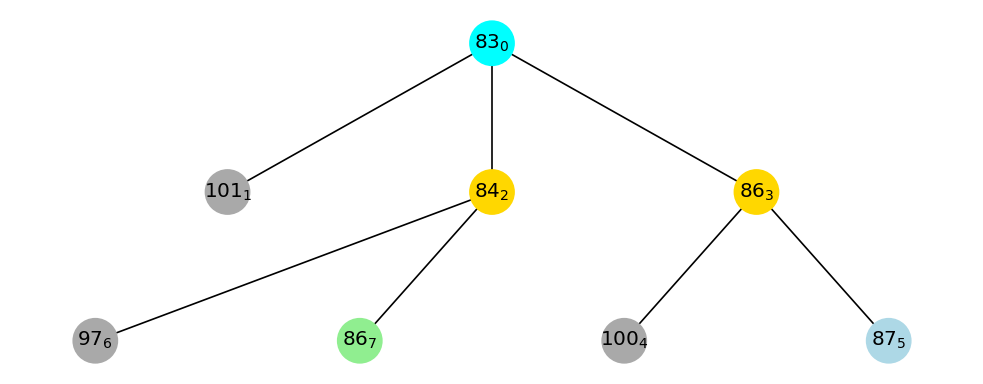

In [4]:
plot_tree(bnb.root, dpi=120, figsize=[8, 3])